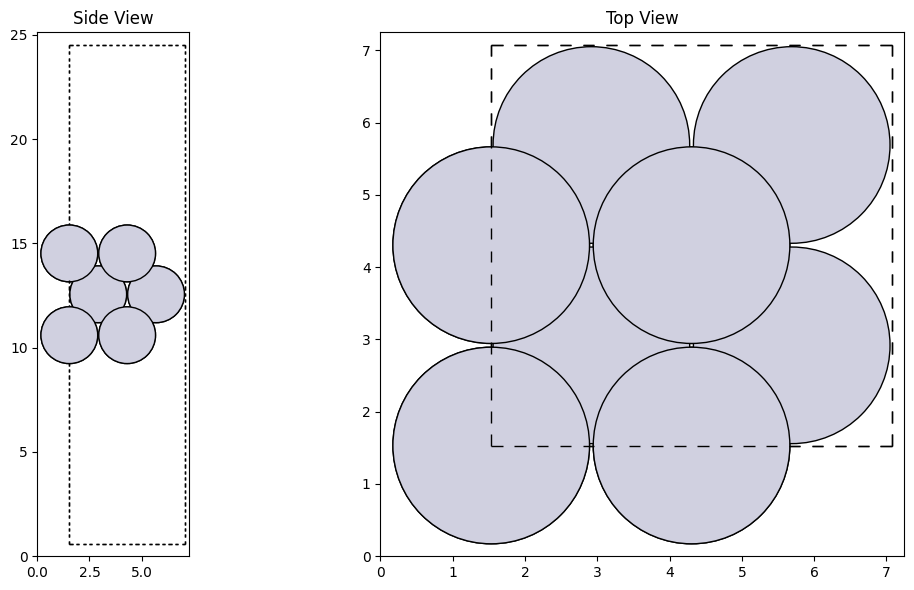

In [16]:
import matplotlib.pyplot as plt
from ase.build import fcc100
from ase.visualize.plot import plot_atoms
from ase.visualize import view

# Create the Pt(100) surface with specified size and vacuum
slab = fcc100('Pt', size=(2, 2, 3), vacuum=10.0)

# Visualize the Pt(100) surface
fig, axs = plt.subplot_mosaic([['side', 'top']], figsize=(12, 6))
plot_atoms(slab, axs['side'], rotation='90x,90y')
plot_atoms(slab, axs['top'])
axs['side'].set_title('Side View')
axs['top'].set_title('Top View')
plt.tight_layout()
plt.show()

In [17]:
from ase.build import molecule

In [18]:
buckyball = molecule("C60")
# plot_atoms(buckyball)
view(buckyball, viewer='x3d')

In [19]:
view(slab, viewer='x3d')

In [20]:
from ase.build.surface import add_adsorbate

# Create the CO molecule
co_molecule = molecule('CO')

# Adjust the position of CO
co_molecule.set_distance(0, 1, 1.14)

# Add the CO molecule to the Pt(100) surface
add_adsorbate(slab, co_molecule, height=4, position=(3, 3))

# # Visualize the slab with CO adsorbed
# fig, axs = plt.subplot_mosaic([['side', 'top']], figsize=(12, 6))
# plot_atoms(slab, axs['side'], radii=0.5, rotation='-90x')
# plot_atoms(slab, axs['top'], radii=0.5)
# axs['side'].set_title('Side View with CO Adsorbed')
# axs['top'].set_title('Top View with CO Adsorbed')
# plt.tight_layout()
# plt.show()
view(slab, viewer='x3d')

In [21]:
from mace.calculators import mace_mp
from ase.optimize import BFGS

# Set up the MACE calculator
macemp = mace_mp()

# Attach the calculator to the slab
slab.calc = macemp

# Optimize the slab with CO adsorbed
opt = BFGS(slab, logfile='Pt100_CO.log')
opt.run(fmax=0.05)

# # Visualize the optimized structure
# fig, axs = plt.subplot_mosaic([['side', 'top']], figsize=(12, 6))
# plot_atoms(slab, axs['side'], radii=0.5, rotation='-90x')
# plot_atoms(slab, axs['top'], radii=0.5)
# axs['side'].set_title('Optimized Side View')
# axs['top'].set_title('Optimized Top View')
# plt.tight_layout()
# plt.show()

/Users/robertwexler/miniconda3/envs/comp-prob-solv/lib/python3.12/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_ind

Using Materials Project MACE for MACECalculator with /Users/robertwexler/.cache/mace/5yyxdm76
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/Users/robertwexler/miniconda3/envs/comp-prob-solv/lib/python3.12/site-packages/mace/calculators/mace.py:128: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=mode

True

In [22]:
view(slab, viewer="x3d")

In [27]:
from ase import units
from ase.md.andersen import Andersen
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution

In [41]:
# Set the temperature and time step
temperature = 1200  # Kelvin
timestep = 1.0  # fs

In [42]:
slab.get_velocities()

array([[ 1.07622535e-02, -7.99647876e-05, -1.15125973e-02],
       [-1.73702797e-02,  5.48023241e-03,  2.52667466e-04],
       [-3.77116381e-03,  8.34461891e-03, -6.47443176e-03],
       [-3.39379301e-04,  2.06810540e-03,  1.89645076e-03],
       [ 1.03450936e-02, -4.12146706e-03,  1.48879824e-02],
       [ 1.76321040e-02, -1.15559238e-02, -3.37993444e-03],
       [-7.23877695e-03,  3.83342020e-03,  7.47440113e-03],
       [-1.17966544e-02, -4.11662388e-03, -1.60388191e-02],
       [-7.49358193e-03,  1.69541201e-03,  4.77396963e-03],
       [-3.50349327e-03, -1.18595042e-02, -4.93766528e-03],
       [ 6.34250183e-03, -7.53472032e-04,  1.11042928e-02],
       [ 6.75131074e-03,  5.47245199e-03, -4.95141885e-03],
       [ 2.47054360e-03,  5.45276381e-02,  5.16774585e-02],
       [-8.48724513e-03,  1.82051033e-02,  4.33175736e-02]])

In [43]:
# Initialize velocities according to the Maxwell-Boltzmann distribution
MaxwellBoltzmannDistribution(slab, temperature_K=temperature)

In [44]:
slab.get_velocities()

array([[ 2.58285991e-02,  2.95077520e-02, -5.58755725e-02],
       [-4.27727855e-02, -4.29664481e-03,  1.22799592e-02],
       [ 5.16042430e-02, -6.19316575e-03,  1.53953261e-02],
       [ 1.16138884e-02, -1.82420514e-02,  2.47668992e-02],
       [ 5.75274523e-03,  4.49948966e-02, -1.43887202e-03],
       [-1.25421221e-03,  7.31589055e-03,  5.38811679e-05],
       [-3.46280866e-03, -3.03424844e-02,  8.04262556e-03],
       [ 8.36300087e-03, -1.59980022e-02,  2.70300943e-02],
       [-2.54399786e-02, -1.08983243e-02,  3.71423863e-02],
       [-2.51530701e-02,  4.00683361e-02,  2.19575722e-02],
       [-5.38954808e-04, -2.05166785e-02, -2.10618054e-02],
       [-2.38398990e-02,  2.23766050e-03, -1.83934346e-02],
       [ 7.88306635e-03, -2.77445309e-02, -1.43525544e-01],
       [ 2.01024442e-01, -7.07877978e-02, -3.51770937e-02]])

In [45]:
# Set up the Andersen dynamics
dyn = Andersen(
    slab, 
    timestep * units.fs, 
    temperature_K=temperature, 
    andersen_prob=0.1)

In [46]:
# Lists to store energies
kinetic_energies = []
potential_energies = []
total_energies = []

# Function to store energies
def store_energies():
    kinetic_energy = slab.get_kinetic_energy()
    potential_energy = slab.get_potential_energy()
    total_energy = kinetic_energy + potential_energy
    kinetic_energies.append(kinetic_energy)
    potential_energies.append(potential_energy)
    total_energies.append(total_energy)

# Attach the function to the dynamics
dyn.attach(store_energies, interval=1)

In [47]:
# Run the MD simulation for 100 steps
dyn.run(200)

True

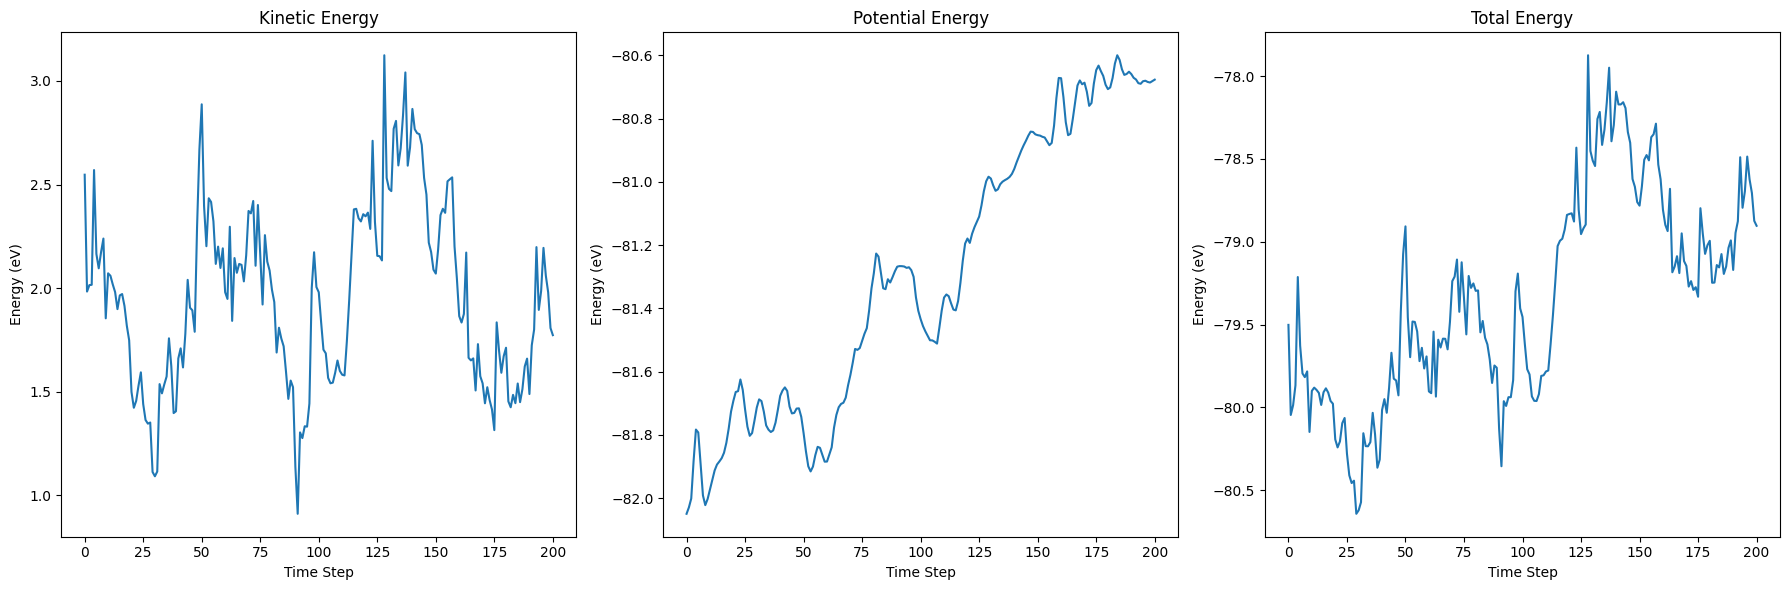

In [48]:
# Plot the energy during the simulation
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].set_title('Kinetic Energy')
axs[0].plot(kinetic_energies)
axs[0].set_xlabel('Time Step')
axs[0].set_ylabel('Energy (eV)')

axs[1].set_title('Potential Energy')
axs[1].plot(potential_energies)
axs[1].set_xlabel('Time Step')
axs[1].set_ylabel('Energy (eV)')

axs[2].set_title('Total Energy')
axs[2].plot(total_energies)
axs[2].set_xlabel('Time Step')
axs[2].set_ylabel('Energy (eV)')

plt.tight_layout()
plt.show()

In [51]:
view(slab, viewer="x3d")